In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# install plotly
#conda install -c conda-forge python-kaleido   #to write a pdf file image

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv("../astrogen_DB.csv")
dat  = np.asarray(df)

gen    = dat[:,15] 
age    = dat[:,16] 
cic    = dat[:,10] 


tipo= ['Asistente','Adjunto','Independiente','Principal','Superior']

plt.style.use('seaborn-whitegrid')

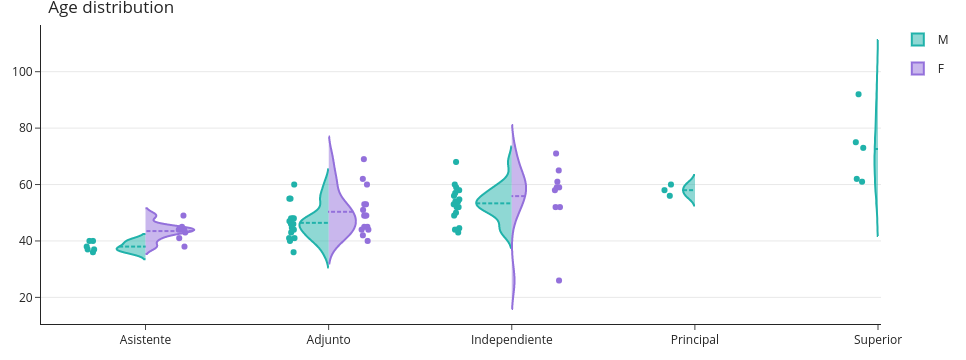

In [5]:
pointpos_male  = [-0.6,-0.4,-0.6,-0.3,-0.2]
pointpos_female  = [0.40,0.4,0.5,0.3,0.2]
show_legend = [True,False,False,False,False]

fig = go.Figure()

for i in range(len(tipo)):
    fig.add_trace(go.Violin(x = cic[(gen == 'm') & (age >0) & (cic==tipo[i])],
                            y = age[(gen == 'm') & (age >0) & (cic==tipo[i])],
                            legendgroup='M', scalegroup='M', name='M',
                            side='negative',
                            pointpos=pointpos_male[i], # where to position points
                            line_color='lightseagreen',
                            showlegend=show_legend[i])
             )
    fig.add_trace(go.Violin(x = cic[(gen == 'f') & (age >0) & (cic==tipo[i])],
                            y = age[(gen == 'f') & (age >0) & (cic==tipo[i])],
                            legendgroup='F', scalegroup='F', name='F',
                            side='positive',
                            pointpos=pointpos_female[i],
                            line_color='mediumpurple',
                            showlegend=show_legend[i])
             )
             
# update characteristics shared by all traces
fig.update_traces(meanline_visible=True,
                  points='all', # show all points
                  jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count
fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20), 
    template="simple_white", 
    title_text="Age distribution",
    violingap=0, violingroupgap=0, violinmode='overlay')

fig.update_yaxes( # the y-axis is in dollars
     showgrid=True
)

fig.show()

fig.write_image("vio.pdf")

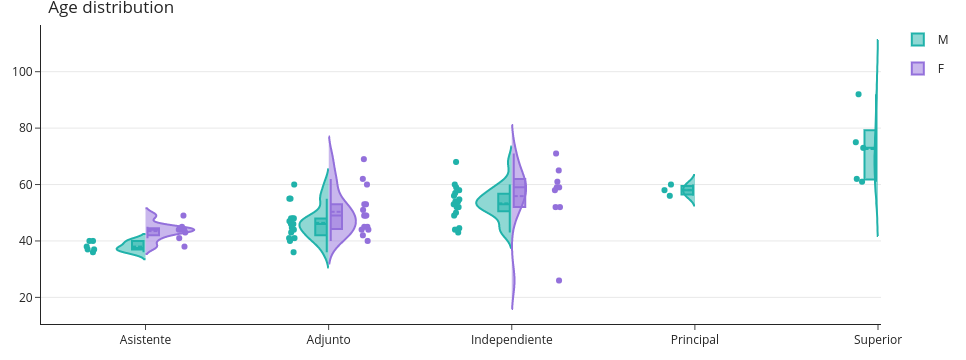

In [6]:
fig = go.Figure()

for i in range(len(tipo)):
    fig.add_trace(go.Violin(x = cic[(gen == 'm') & (age >0) & (cic==tipo[i])],
                            y = age[(gen == 'm') & (age >0) & (cic==tipo[i])],
                            legendgroup='M', scalegroup='M', name='M',box_visible=True,
                            side='negative',
                            pointpos=pointpos_male[i], # where to position points
                            #line_color='#8dd3c7',
                            line_color='lightseagreen',
                            showlegend=show_legend[i])
             )
    fig.add_trace(go.Violin(x = cic[(gen == 'f') & (age >0) & (cic==tipo[i])],
                            y = age[(gen == 'f') & (age >0) & (cic==tipo[i])],
                            legendgroup='F', scalegroup='F', name='F',box_visible=True,
                            side='positive',
                            pointpos= pointpos_female[i],
                            #line_color='#bebada',
                            line_color='mediumpurple',
                            showlegend=show_legend[i])
             )
             
# update characteristics shared by all traces
fig.update_traces(meanline_visible=True,
                  points='all', # show all points
                  jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count
fig.update_layout(
    #title_text="Age distribution",
    margin=dict(l=20, r=20, t=25, b=20),   
    template="simple_white",    
    title_text="Age distribution",
    violingap=0, violingroupgap=0, violinmode='overlay')

fig.update_yaxes( # the y-axis is in dollars
     showgrid=True
)

fig.show()
fig.write_image("vio1.pdf")